In [1]:
import pandas as pd
import os
import streamlit as st
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import date,timedelta
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from streamlit_autorefresh import st_autorefresh
import plotly.express as px
import datetime
from time import sleep
import matplotlib.ticker as ticker

In [2]:
def le_arquivo_excel(endereco,aba,linha):
    # Carrega dataframe da planilha
    if aba == 0:
        df = pd.read_excel(endereco, header=linha)
    else:
        df = pd.read_excel(endereco, sheet_name= aba, header=linha)
    return df

     
def abrir_historico(pasta,mes_atual):
    caminhos = []    
    for nome in os.listdir(pasta):
        
        if nome[0:2].isnumeric() == True:
            if "~" not in nome:
                caminhos.append(os.path.join(pasta, nome))
        elif mes_atual == True:
            if "~" not in nome:
                caminhos.append(os.path.join(pasta, nome))
    caminhos.sort()
    return caminhos

def flat_files(caminhos):
    flat_list = []
    for sublist in caminhos:
        for item in sublist:
            if item.find(key) != -1:
                flat_list.append(item)

    return flat_list

def heatmap_book(tabela,axh,fig):   
    ma = tabela.max(axis = 1, skipna = True).max()
    mi = tabela.min(axis = 1, skipna = True).min()
    
    ma = abs(ma)
    mi = abs(mi)
    
    if (ma - mi) > 0.0:
        f = ma
    else:
        f = mi
    
    fma=ma
    fmi=-1*ma
    
    sns.heatmap(tabela,
            ax=axh,
            annot=False,
            cmap = 'RdYlGn',
            fmt='.0f',
            cbar = True,
            annot_kws={"fontsize":14},
            vmax = fma,
            vmin = fmi
            )
    plt.show()
    return tabela

D:\Eduardo\Python\streamlit\Dados\11\12\WINZ21 2021_11_12-14_21_47.parquet


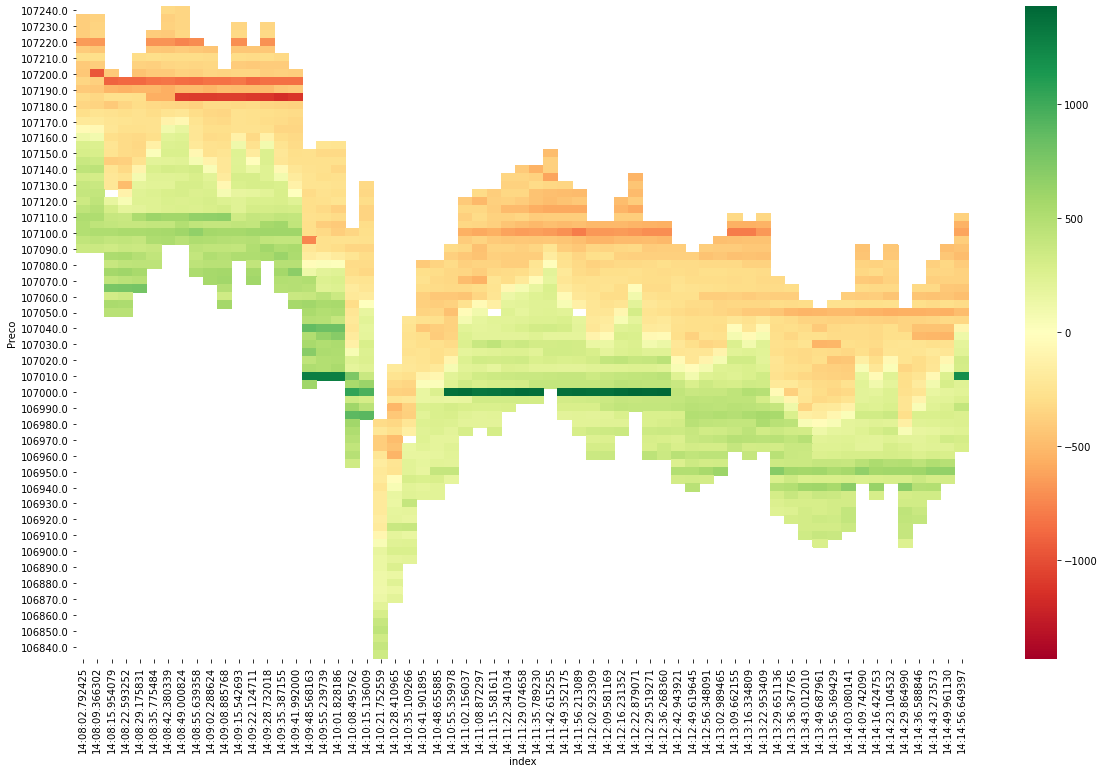

In [80]:
folder = r'D:\Eduardo\Python\streamlit\Dados\11\12'
key='WINZ21'
start_files = 10
n_files = 1


files = abrir_historico(folder,True)

caminhos = []

caminhos.append(files)


caminhos = flat_files(caminhos)
caminhos = caminhos[-start_files:]
caminhos = caminhos[:n_files]

df = pd.DataFrame()
for end in caminhos:
        if end.find(key) != -1:
            print(end)
            df_read = pd.read_parquet(end)
            df = df.append(df_read)
            df.reset_index()  

colunas = df.columns
df = df.reindex(columns=colunas.sort_values())

df = df.reset_index()
df['index'] = pd.to_datetime(df['index'], format="%H:%M:%S - %f").dt.time

df = df.loc[df['index']>=datetime.time(14,8,0)]
df = df.loc[df['index']<=datetime.time(14,15,0)]

df = df.set_index('index') 
df = df.T
df = df.sort_index(ascending=False)

df.dropna(axis = 0, how = 'all', inplace = True)

df_o = df

heatmap,axh = plt.subplots(figsize=(20,12))
heatmap_book(df,axh,heatmap)

total = df.sum()
total.name = 'Total'
df = df.append(total.transpose())
df = df.T


2021-11-17 22:22:54.798 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-11-17 22:22:54.800 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


D:\Eduardo\Python\streamlit\Dados\11\12\WINZ21 2021_11_12-14_21_47.parquet


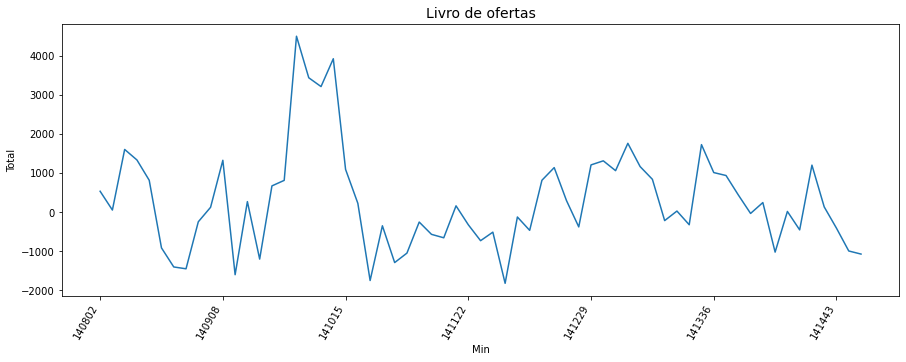

In [81]:
folder = r'D:\Eduardo\Python\streamlit\Dados\11\12'
key='WINZ21'
start_files = 10
n_files = 1


files = abrir_historico(folder,True)

caminhos = []

caminhos.append(files)


caminhos = flat_files(caminhos)
caminhos = caminhos[-start_files:]
caminhos = caminhos[:n_files]

df = pd.DataFrame()
for end in caminhos:
        if end.find(key) != -1:
            print(end)
            df_read = pd.read_parquet(end)
            df = df.append(df_read)
            df.reset_index()  

colunas = df.columns
df = df.reindex(columns=colunas.sort_values())


df = df.reset_index()
df['index2'] = pd.to_datetime(df['index'], format="%H:%M:%S - %f").dt.time

df = df.loc[df['index2']>=datetime.time(14,8,0)]
df = df.loc[df['index2']<=datetime.time(14,15,0)]
df = df.drop(columns='index2')


df = df.reset_index()
df['index'] = pd.to_datetime(df['index'], format="%H:%M:%S - %f")
df = df.set_index('index')

df['Total'] = df.sum(axis=1)
df = df.reset_index()

df['Min'] = df['index'].dt.strftime('%H%M%S')




fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='Min',y='Total',data=df,ax=ax)

plt.xticks(rotation=60, horizontalalignment='right')
ax.set_title('Livro de ofertas', fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))



D:\Eduardo\Python\streamlit\Dados\11\12\tt 2021_11_12-14_21_47.parquet


2021-11-17 22:26:21.068 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-11-17 22:26:21.075 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


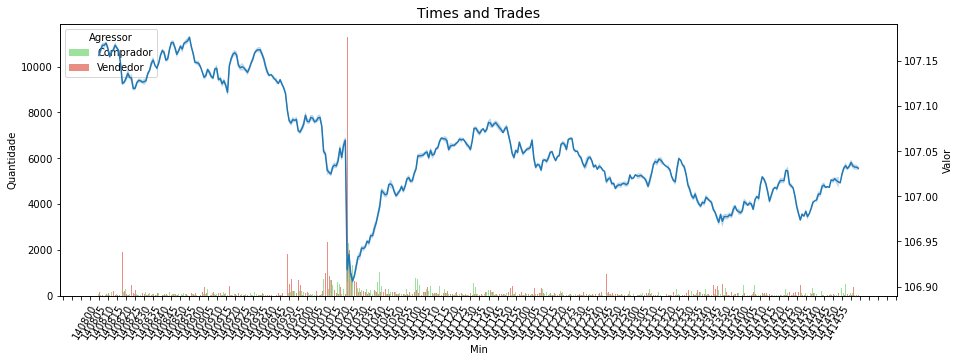

In [86]:
folder = r'D:\Eduardo\Python\streamlit\Dados\11\12'
key='tt'
start_files = 10
n_files = 1


files = abrir_historico(folder,True)

caminhos = []

caminhos.append(files)

caminhos = flat_files(caminhos)
caminhos = caminhos[-start_files:]
caminhos = caminhos[:n_files]

df = pd.DataFrame()
for end in caminhos:
        if end.find(key) != -1:
            print(end)
            df_read = pd.read_parquet(end)
            df = df.append(df_read)
            df.reset_index()  
            
df['Valor'] = df['Valor'].replace(['.'], ',')
df['Valor'] = df['Valor'].apply(pd.to_numeric)
  
df = df.sort_values(by=['Data'])

df_o = df

#######################################################
### gera grafico
#######################################################

df = df_o

df['Data'] =  pd.to_datetime(df['Data'], format='%H:%M:%S.%f')

df = df.set_index('Data')
df = df.between_time('14:08', '14:15')
df = df.reset_index()



df['Min'] = df['Data'].dt.strftime('%H%M%S')
df['Quantidade'] = round(df['Quantidade'].astype(str).astype(float),0).astype(int)

df = df.loc[df['Agressor']!='RLP']


df = df.groupby(['Min','Agressor']).agg({'Quantidade':'sum',
                                    'Valor':'mean'})
df = df.reset_index()

palette ={"Comprador": "lightgreen", "Vendedor": "salmon"}

fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='Min',y='Quantidade',data=df,ax=ax,hue='Agressor',palette=palette)
plt.xticks(rotation=60, horizontalalignment='right')
ax.set_title('Times and Trades', fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

ax2 = ax.twinx()

sns.lineplot(x='Min',y='Valor',data=df,ax=ax2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

None


D:\Eduardo\Python\streamlit\Dados\11\12\WINZ21 2021_11_12-09_25_47.parquet
D:\Eduardo\Python\streamlit\Dados\11\12\WINZ21 2021_11_12-09_52_38.parquet
D:\Eduardo\Python\streamlit\Dados\11\12\WINZ21 2021_11_12-10_20_10.parquet


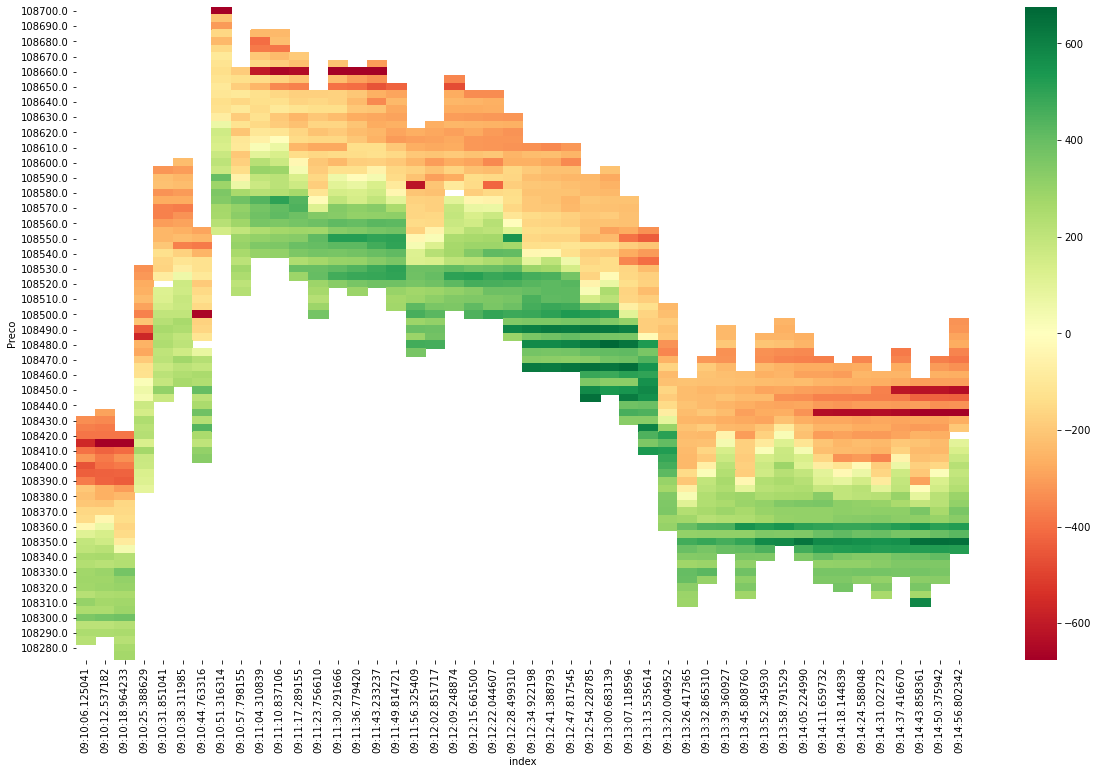

index,09:10:06.125041,09:10:12.537182,09:10:18.964233,09:10:25.388629,09:10:31.851041,09:10:38.311985,09:10:44.763316,09:10:51.316314,09:10:57.798155,09:11:04.310839,...,09:13:58.791529,09:14:05.224990,09:14:11.659732,09:14:18.144839,09:14:24.588048,09:14:31.022723,09:14:37.416670,09:14:43.858361,09:14:50.375942,09:14:56.802342
Preco,,,,,,,,,,,,,,,,,,,,,
108700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2262.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-215.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-310.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-155.0,NaN,-242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-238.0,NaN,-401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108295.0,211.0,215.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108290.0,251.0,251.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108285.0,223.0,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
folder = r'D:\Eduardo\Python\streamlit\Dados\11\12'
key='WINZ21'
start_files = 21
n_files = 3


files = abrir_historico(folder,True)

caminhos = []

caminhos.append(files)


caminhos = flat_files(caminhos)
caminhos = caminhos[-start_files:]
caminhos = caminhos[:n_files]

df = pd.DataFrame()
for end in caminhos:
        if end.find(key) != -1:
            print(end)
            df_read = pd.read_parquet(end)
            df = df.append(df_read)
            df.reset_index()  

colunas = df.columns
df = df.reindex(columns=colunas.sort_values())

df = df.reset_index()
df['index'] = pd.to_datetime(df['index'], format="%H:%M:%S - %f").dt.time


df = df.loc[df['index']>=datetime.time(9,10,0)]
df = df.loc[df['index']<=datetime.time(9,15,0)]

df = df.set_index('index') 

#df = df.between_time('16:33', '16:34')

df = df.T
df = df.sort_index(ascending=False)

df.dropna(axis = 0, how = 'all', inplace = True)

heatmap,axh = plt.subplots(figsize=(20,12))
heatmap_book(df,axh,heatmap)